In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models
import os
import copy
from helper import * 

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


style_img = image_loader("picasso.jpg")
content_img = image_loader("dancing.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

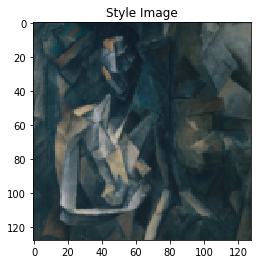

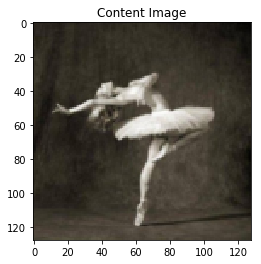

In [4]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [5]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [6]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [7]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']


In [8]:
input_img = content_img.clone()


Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 104.222298 Content Loss: 18.674566

run [100]:
Style Loss : 34.418087 Content Loss: 17.213608

run [150]:
Style Loss : 14.919826 Content Loss: 15.294770

run [200]:
Style Loss : 7.219190 Content Loss: 13.325019

run [250]:
Style Loss : 4.300452 Content Loss: 11.671252

run [300]:
Style Loss : 3.036552 Content Loss: 10.471911



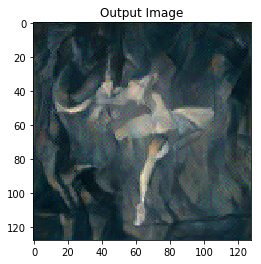

In [9]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img,content_layers_default,style_layers_default)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()